### Linear Regression Basics

$$ y = ax + \beta$$

### 1. Aim of Linear Regression
- Minimize the distance between the ponts and the line ( $y = ax + \beta$ )
- By adjusting
    - Coefficient ( $a$ )
    - Bias/Intercept ( $\beta$ )

### 2. Building a Linear Regression Model

$$ y = 2x + 1 $$

- Coeffeicent $a = 2$
- Bias / Intercept $\beta = 1$

### 2. 1. Building Dataset

In [62]:
# example dataset

x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [63]:
# convert to numpy

import numpy as np

x_train = np.array(x_values, dtype=np.float32)
print(x_train.shape)

(11,)


In [64]:
# we need 2 dimensional array

x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [65]:
y_values = [2*i +1 for i in x_values]

In [66]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [67]:
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2. 2. Building Model

In [68]:
import torch
import torch.nn as nn  # required for linear regression model
from torch.autograd import Variable

1. Linear Model Equation
    - $y = 2x + 1$
    
2. Forward
    - Example
        - Input $x = 1$
        - Output $\hat{y}  = ?$

### 2. 3. Create Linear Regression Model Class

In [69]:
# define model
class LinearRegressionModel(nn.Module):
    
    # initialize
    def __init__(self, input_size, output_size):
        
        # python super function
        # inherite all from nn.Module
        super(LinearRegressionModel, self).__init__()
        
        # pass input, output dimension 
        self.linear = nn.Linear(input_dim, output_dim)
        
    # for every value of x, goes through linear model
    def forward(self, x):
        out = self.linear(x)
        return out

In [70]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

### 2. 4. Create Loss Class

- MSE Loss : Mean Squared Error
- $MSE = \dfrac{1}{n} \sum_{i=1}^{n}(\hat{y}_i - y_i$
    - $\hat{y}$ : prediction
    - $y$ : true value

In [71]:
criterion = nn.MSELoss()

### 2. 5 Optimizer Class

Simplified Equation
- $\theta = \theta - \eta \cdot \nabla_\theta$
- ( `parameters` = `parameters` - `learning_rate` x `parameters_gradient` )
    - $\theta$ : parameters(our variables)
    - $\eta$ : learning rate(how fast we want to learn
    - $\nabla_\theta$ : parameters' gradients

    
- Parameters in our linear regression model
    - $a$ , $\beta$ in $y = ax + \beta$

In [72]:
learning_rate = 0.01

# Steepest Gradient Decent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### 2. 6 Train Model

- 1 epoch : going through the whole `x_train` data once
    - 100 epoch:
        - 100 x mapping `x_train`
        
- Process steps
    1. convert inputs/labels to variables
    2. clear gradent buffets
    3. get output given inputs
    4. get loss
    5. get gradient w.r.t. parameters
    6. update parameters using gradents
        - `parameters` = `parameters` - `learning_rate` x `parameters_gradient`
    7. Repeat Whole Process

In [73]:
epochs = 200

for epoch in range(epochs):
    epoch += 1
    
    # convert numpy array to Torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradient w.r.t. parameters
    optimizer.zero_grad()
    
    # forward to get output
    outputs = model(inputs)
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    print('epoch {}, loss{}'.format(epoch, loss.data[0]))

epoch 1, loss158.53024291992188
epoch 2, loss13.26687240600586
epoch 3, loss1.414445400238037
epoch 4, loss0.44397029280662537
epoch 5, loss0.36114197969436646
epoch 6, loss0.3507571220397949
epoch 7, loss0.34632259607315063
epoch 8, loss0.3424127697944641
epoch 9, loss0.33858588337898254
epoch 10, loss0.33480456471443176
epoch 11, loss0.33106568455696106
epoch 12, loss0.3273687958717346
epoch 13, loss0.3237132132053375
epoch 14, loss0.3200986087322235
epoch 15, loss0.3165237009525299
epoch 16, loss0.31298932433128357
epoch 17, loss0.30949410796165466
epoch 18, loss0.3060379922389984
epoch 19, loss0.3026205599308014
epoch 20, loss0.299241304397583
epoch 21, loss0.29589974880218506
epoch 22, loss0.2925955057144165
epoch 23, loss0.28932827711105347
epoch 24, loss0.28609699010849
epoch 25, loss0.28290247917175293
epoch 26, loss0.2797434329986572
epoch 27, loss0.27661949396133423
epoch 28, loss0.273530513048172
epoch 29, loss0.2704758942127228
epoch 30, loss0.2674556076526642
epoch 31, los

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


### 2. 7. Test Data

In [74]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.62962395],
       [ 2.6829612 ],
       [ 4.7362986 ],
       [ 6.789636  ],
       [ 8.842974  ],
       [10.896311  ],
       [12.949649  ],
       [15.002986  ],
       [17.056322  ],
       [19.10966   ],
       [21.162996  ]], dtype=float32)

In [75]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### 3. Plot Graph

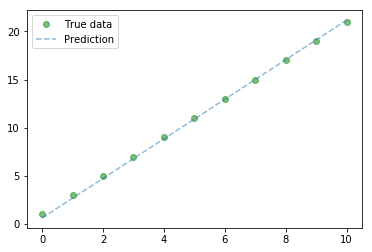

In [79]:
import matplotlib.pyplot as plt

plt.clf()
predicted = predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Prediction', alpha=0.5)
plt.legend(loc='best')
plt.show()

### 4. save and load model

In [80]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'lr_model_example.pkl')

In [81]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('lr_model_example.pkl'))